In [1]:
import numpy as np
import matplotlib.pyplot as plt
from well import Well
from geometry_keeper import GeometryKeeper
from scipy.integrate import quad
from scipy.special import k0, iti0k0
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
n_stehf = 10
xwd = 2.5
xed = 5.
ywd = 2.5
yed = 5.
N = 20
s = 7
su = s**0.5

params = {"nseg": N, "kx": 1., "ky": 1., "kz": 1., "omega": 1, "lambda": 1, "Fcd":100, "ref_length":1.,
         "z_ref_length": 1, "xed": xed, "yed": yed}
nnnn_well = Well(xwd, ywd, "nnnn", top_bound, bottom_bound, wtype, params, n_stehf)
inf_well = Well(xwd, ywd, "infinite", top_bound, bottom_bound, wtype, params, n_stehf)

In [3]:
# for inf_well:
alims1 = inf_well.lapl_well.gk["alims1"]
alims2 = inf_well.lapl_well.gk["alims2"]
mask1 = np.array(inf_well.lapl_well.gk["mask_int_1"])
mask2 = np.array(inf_well.lapl_well.gk["mask_int_2"])
green_inf_ref = inf_well.lapl_well.get_green_matrix(s)
green_inf_constructed = 0.5/su*iti0k0(su*alims1)[1]*mask1 + 0.5/su*iti0k0(su*alims2)[1]*mask2
np.allclose(green_inf_constructed, green_inf_ref)

True

In [4]:
xis = nnnn_well.lapl_well.gk["mxd"]
xjs = nnnn_well.lapl_well.gk["mxj"]
xj1s = nnnn_well.lapl_well.gk["mxj1"]
yds = nnnn_well.lapl_well.gk["myd_"]
green_nnnn_native_k0 = nnnn_well.lapl_well.source.ifb3_k(s, 0, xis, xjs, xj1s, xed, np.abs(yds-ywd))
green_nnnn_native = nnnn_well.lapl_well.source.ifb3_1(s, xis, xjs, xj1s, xed, np.abs(yds-ywd))

In [5]:
green_inf_ref

matrix([[  9.58343681e-02,   5.49574082e-02,   3.74892892e-02, ...,
           1.03673559e-04,   8.96746373e-05,   7.75907670e-05],
        [  5.49574082e-02,   9.58343681e-02,   5.49574082e-02, ...,
           1.19898163e-04,   1.03673559e-04,   8.96746373e-05],
        [  3.74892892e-02,   5.49574082e-02,   9.58343681e-02, ...,
           1.38711075e-04,   1.19898163e-04,   1.03673559e-04],
        ..., 
        [  1.03673559e-04,   1.19898163e-04,   1.38711075e-04, ...,
           9.58343681e-02,   5.49574082e-02,   3.74892892e-02],
        [  8.96746373e-05,   1.03673559e-04,   1.19898163e-04, ...,
           5.49574082e-02,   9.58343681e-02,   5.49574082e-02],
        [  7.75907670e-05,   8.96746373e-05,   1.03673559e-04, ...,
           3.74892892e-02,   5.49574082e-02,   9.58343681e-02]])

In [6]:
green_nnnn_native_k0

array([[  9.58380052e-02,   5.49601348e-02,   3.74919981e-02, ...,
          1.03694106e-04,   8.96918739e-05,   7.76063890e-05],
       [  5.49601348e-02,   9.58371731e-02,   5.49594122e-02, ...,
          1.19915253e-04,   1.03689254e-04,   8.96876452e-05],
       [  3.74919981e-02,   5.49594122e-02,   9.58365454e-02, ...,
          1.38726862e-04,   1.19911024e-04,   1.03685568e-04],
       ..., 
       [  1.03694106e-04,   1.19915253e-04,   1.38726862e-04, ...,
          9.58346011e-02,   5.49571760e-02,   3.74894260e-02],
       [  8.96918739e-05,   1.03689254e-04,   1.19911024e-04, ...,
          5.49571760e-02,   9.58346011e-02,   5.49571760e-02],
       [  7.76063890e-05,   8.96876452e-05,   1.03685568e-04, ...,
          3.74894260e-02,   5.49571760e-02,   9.58346010e-02]])

In [7]:
green_nnnn_native

array([[  9.58380053e-02,   5.49601349e-02,   3.74919982e-02, ...,
          1.03705786e-04,   8.97052702e-05,   7.76217548e-05],
       [  5.49601349e-02,   9.58371732e-02,   5.49594123e-02, ...,
          1.19928648e-04,   1.03704619e-04,   8.97052702e-05],
       [  3.74919982e-02,   5.49594123e-02,   9.58365455e-02, ...,
          1.38742226e-04,   1.19928648e-04,   1.03705786e-04],
       ..., 
       [  1.03705786e-04,   1.19928648e-04,   1.38742226e-04, ...,
          9.58365455e-02,   5.49594123e-02,   3.74919982e-02],
       [  8.97052702e-05,   1.03704619e-04,   1.19928648e-04, ...,
          5.49594123e-02,   9.58371732e-02,   5.49601349e-02],
       [  7.76217548e-05,   8.97052702e-05,   1.03705786e-04, ...,
          3.74919982e-02,   5.49601349e-02,   9.58380053e-02]])

In [8]:
nnnn_well.lapl_well.source.ifb3_2(s, xjs, xj1s, xed, np.abs(yds-ywd))

array([[-0.00593705, -0.00593705, -0.00593705, ..., -0.00593705,
        -0.00593705, -0.00593705],
       [-0.00593705, -0.00593705, -0.00593705, ..., -0.00593705,
        -0.00593705, -0.00593705],
       [-0.00593705, -0.00593705, -0.00593705, ..., -0.00593705,
        -0.00593705, -0.00593705],
       ..., 
       [-0.00593705, -0.00593705, -0.00593705, ..., -0.00593705,
        -0.00593705, -0.00593705],
       [-0.00593705, -0.00593705, -0.00593705, ..., -0.00593705,
        -0.00593705, -0.00593705],
       [-0.00593705, -0.00593705, -0.00593705, ..., -0.00593705,
        -0.00593705, -0.00593705]])

In [9]:
outer_bound = "nnnn"
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
n_stehf = 10
xwd = 2.5
xed = 5.
ywd = 2.5
yed = 5.
N = 20
s = 7.

params = {"nseg": N, "kx": 1., "ky": 1., "kz": 1., "omega": 1, "lambda": 1, "Fcd":100, "ref_length":1.,
         "z_ref_length": 1, "xed": xed, "yed": yed}
real_well = Well(xwd, ywd, outer_bound, top_bound, bottom_bound, wtype, params, n_stehf)
well = real_well.lapl_well

In [10]:
real_well.get_pw(1)

1.2235602114810717

In [9]:
s = 1
xis = well.gk["mxd"]
xjs = well.gk["mxj"]
xj1s = well.gk["mxj1"]
yds = well.gk["myd_"]
well.source.ifb3_k(s, 0, xis, xjs, xj1s, xed, np.abs(yds-ywd))

array([[ 0.12094685,  0.07976397,  0.06167542, ...,  0.00353113,
         0.00331919,  0.00312087],
       [ 0.07976397,  0.12085769,  0.07967996, ...,  0.00374642,
         0.00352043,  0.00330907],
       [ 0.06167542,  0.07967996,  0.12077853, ...,  0.00397748,
         0.0037363 ,  0.00351086],
       ..., 
       [ 0.00353113,  0.00374642,  0.00397748, ...,  0.12014084,
         0.07900315,  0.06095716],
       [ 0.00331919,  0.00352043,  0.0037363 , ...,  0.07900315,
         0.12013943,  0.07900181],
       [ 0.00312087,  0.00330907,  0.00351086, ...,  0.06095716,
         0.07900181,  0.12013817]])

In [10]:
a1_ = (xjs + xis)
b1_ = (xj1s + xis)
a2_ = (xjs - xis)
b2_ = (xj1s - xis)

In [11]:
a2_

array([[-0.025,  0.025,  0.075, ...,  1.825,  1.875,  1.925],
       [-0.075, -0.025,  0.025, ...,  1.775,  1.825,  1.875],
       [-0.125, -0.075, -0.025, ...,  1.725,  1.775,  1.825],
       ..., 
       [-1.875, -1.825, -1.775, ..., -0.025,  0.025,  0.075],
       [-1.925, -1.875, -1.825, ..., -0.075, -0.025,  0.025],
       [-1.975, -1.925, -1.875, ..., -0.125, -0.075, -0.025]])

In [12]:
b2_

array([[ 0.025,  0.075,  0.125, ...,  1.875,  1.925,  1.975],
       [-0.025,  0.025,  0.075, ...,  1.825,  1.875,  1.925],
       [-0.075, -0.025,  0.025, ...,  1.775,  1.825,  1.875],
       ..., 
       [-1.825, -1.775, -1.725, ...,  0.025,  0.075,  0.125],
       [-1.875, -1.825, -1.775, ..., -0.025,  0.025,  0.075],
       [-1.925, -1.875, -1.825, ..., -0.075, -0.025,  0.025]])

In [13]:
inf_well.gk["alims1"]

AttributeError: 'Well' object has no attribute 'gk'

In [ ]:
inf_well.gk["alims2"]

In [14]:
a1_

array([[ 3.025,  3.075,  3.125, ...,  4.875,  4.925,  4.975],
       [ 3.075,  3.125,  3.175, ...,  4.925,  4.975,  5.025],
       [ 3.125,  3.175,  3.225, ...,  4.975,  5.025,  5.075],
       ..., 
       [ 4.875,  4.925,  4.975, ...,  6.725,  6.775,  6.825],
       [ 4.925,  4.975,  5.025, ...,  6.775,  6.825,  6.875],
       [ 4.975,  5.025,  5.075, ...,  6.825,  6.875,  6.925]])

In [15]:
inf_well.get_green_matrix(s)

AttributeError: 'Well' object has no attribute 'get_green_matrix'

In [16]:
xis

array([[ 1.525,  1.525,  1.525, ...,  1.525,  1.525,  1.525],
       [ 1.575,  1.575,  1.575, ...,  1.575,  1.575,  1.575],
       [ 1.625,  1.625,  1.625, ...,  1.625,  1.625,  1.625],
       ..., 
       [ 3.375,  3.375,  3.375, ...,  3.375,  3.375,  3.375],
       [ 3.425,  3.425,  3.425, ...,  3.425,  3.425,  3.425],
       [ 3.475,  3.475,  3.475, ...,  3.475,  3.475,  3.475]])

In [11]:
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
n_stehf = 10
xwd = 2.5
xed = 5.
ywd = 2.5
yed = 5.
N = 20
s = 7.

params = {"nseg": N, "kx": 1., "ky": 1., "kz": 1., "omega": 1, "lambda": 1, "Fcd":100, "ref_length":1.,
         "z_ref_length": 1, "xed": xed, "yed": yed}
real_inf = Well(xwd, ywd, "infinite", top_bound, bottom_bound, wtype, params, n_stehf)
inf_well = real_inf.lapl_well

In [12]:
real_inf.get_pw(1)

1.2288552155946491

In [13]:
real_well.get_pw(1)

1.2235602114810717

In [16]:
ts = np.logspace(-3, 1, 30)
bnd = np.array([])
inf = np.array([])
for t in ts:
    bnd = np.append(bnd, real_well.get_pw(t))
    inf = np.append(inf, real_inf.get_pw(t))

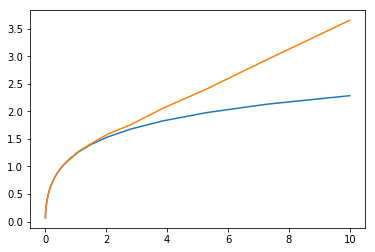

In [18]:
plt.plot(ts, inf)
plt.plot(ts, bnd)

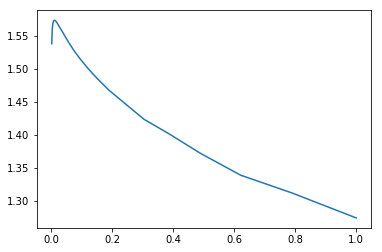

In [8]:
plt.plot(ts, inf/bnd)

In [3]:
def ifb3_k(s, k, xis, xjs, xj1s, xed, dyds):
    su = (s)**0.5
    orig_shape = xis.shape
    fxis, fxjs, fxj1s, fdyds = xis.reshape(-1), xjs.reshape(-1), xj1s.reshape(-1), dyds.reshape(-1)
    ans = np.zeros_like(fxis)
    inds_0 = np.argwhere(np.isclose(fdyds, 0.)).flatten()
    inds_nnz = np.argwhere(fdyds != 0.).flatten()
    xis_0, xjs_0, xj1s_0 = fxis[inds_0], fxjs[inds_0], fxj1s[inds_0]
    xis_nnz, xjs_nnz, xj1s_nnz = fxis[inds_nnz], fxjs[inds_nnz], fxj1s[inds_nnz]
    if len(inds_0) > 0:
        a1 = su*(xjs_0 + xis_0 - 2*k*xed)
        b1 = su*(xj1s_0 + xis_0 - 2*k*xed)
        a2 = su*(xjs_0 - xis_0 - 2*k*xed)
        b2 = su*(xj1s_0 - xis_0 - 2*k*xed)
        s1 = 1 - 2*(a1 > 0.)
        s2 = 1 - 2*(b1 < 0.)
        s3 = 1 - 2*(a2 > 0.)
        s4 = 1 - 2*(b2 < 0.)
        a1 = np.round(np.abs(a1), decimals=6)
        b1 = np.round(np.abs(b1), decimals=6)
        a2 = np.round(np.abs(a2), decimals=6)
        b2 = np.round(np.abs(b2), decimals=6)
        u1, i1 = np.unique(a1, return_inverse = True)
        u2, i2 = np.unique(b1, return_inverse = True)
        u3, i3 = np.unique(a2, return_inverse = True)
        u4, i4 = np.unique(b2, return_inverse = True)
        ua = np.concatenate((u1, u2, u3, u4))
        u, i = np.unique(ua, return_inverse = True)
        va = 1./su/xed*iti0k0(u)[1][i]
        v1 = va[:len(u1)][i1]
        v2 = va[len(u1):len(u1)+len(u2)][i2]
        v3 = va[len(u1)+len(u2):len(u1)+len(u2)+len(u3)][i3]
        v4 = va[len(u1)+len(u2)+len(u3):][i4]
        ans[inds_0] = v1*s1 + v2*s2 + v3*s3 + v4*s4
    if len(inds_nnz) > 0:
        raise NotImplementedError
    return ans.reshape(orig_shape)

def ifb3_1(s, xis, xjs, xj1s, xed, dyds, debug=False):
    KMAX = 100
    EPS = 1e-12
    TINY = 1e-20
    sum_ = ifb3_k(s, 0, xis, xjs, xj1s, xed, dyds)
    try:
        for k in range(1, KMAX):
            d = ifb3_k(s, k, xis, xjs, xj1s, xed, dyds)
            d += ifb3_k(s, -k, xis, xjs, xj1s, xed, dyds)
            sum_ += d
            if np.max(d)/(np.min(sum_) + TINY) < EPS:
                if debug:
                    return (0.5*sum_, k)
                else:
                    return 0.5*sum_
        raise RuntimeWarning("ifb3_1 did not converge in {} steps".format(KMAX))
    except RuntimeWarning:
        return 0.5*sum_
    
def ifb3_2(s, xjs, xj1s, xed, dyds):
    su = s**0.5
    return -0.5*np.pi/xed/su*(xj1s - xjs)*np.exp(-su*dyds)

def ifb3(s, xis, xjs, xj1s, xed, dyds):
    return ifb3_1(s, xis, xjs, xj1s, xed, dyds) + ifb3_2(s, xjs, xj1s, xed, dyds)

In [4]:
xis = well.gk["mxd"]
xjs = well.gk["mxj"]
xj1s = well.gk["mxj1"]
dyds = well.gk["myd"]
yds = well.gk["myd_"]

In [5]:
ans = ifb3_k(s, 0, xis, xjs, xj1s, xed, dyds)

In [6]:
yds

array([[ 2.5,  2.5,  2.5, ...,  2.5,  2.5,  2.5],
       [ 2.5,  2.5,  2.5, ...,  2.5,  2.5,  2.5],
       [ 2.5,  2.5,  2.5, ...,  2.5,  2.5,  2.5],
       ..., 
       [ 2.5,  2.5,  2.5, ...,  2.5,  2.5,  2.5],
       [ 2.5,  2.5,  2.5, ...,  2.5,  2.5,  2.5],
       [ 2.5,  2.5,  2.5, ...,  2.5,  2.5,  2.5]])

In [7]:
ifb3_1(s, xis, xjs, xj1s, xed, dyds, debug=True)

(array([[  1.91676011e-02,   1.09920270e-02,   7.49839964e-03, ...,
           2.07411571e-05,   1.79410540e-05,   1.55243510e-05],
        [  1.09920270e-02,   1.91674346e-02,   1.09918825e-02, ...,
           2.39857296e-05,   2.07409237e-05,   1.79410540e-05],
        [  7.49839964e-03,   1.09918825e-02,   1.91673091e-02, ...,
           2.77484452e-05,   2.39857296e-05,   2.07411571e-05],
        ..., 
        [  2.07411571e-05,   2.39857296e-05,   2.77484452e-05, ...,
           1.91673091e-02,   1.09918825e-02,   7.49839964e-03],
        [  1.79410540e-05,   2.07409237e-05,   2.39857296e-05, ...,
           1.09918825e-02,   1.91674346e-02,   1.09920270e-02],
        [  1.55243510e-05,   1.79410540e-05,   2.07411571e-05, ...,
           7.49839964e-03,   1.09920270e-02,   1.91676011e-02]]), 2)

In [8]:
well.source.ifb3_1(s, xis, xjs, xj1s, xed, dyds, debug=True)

(array([[  1.91676011e-02,   1.09920270e-02,   7.49839964e-03, ...,
           2.07411571e-05,   1.79410540e-05,   1.55243510e-05],
        [  1.09920270e-02,   1.91674346e-02,   1.09918825e-02, ...,
           2.39857296e-05,   2.07409237e-05,   1.79410540e-05],
        [  7.49839964e-03,   1.09918825e-02,   1.91673091e-02, ...,
           2.77484452e-05,   2.39857296e-05,   2.07411571e-05],
        ..., 
        [  2.07411571e-05,   2.39857296e-05,   2.77484452e-05, ...,
           1.91673091e-02,   1.09918825e-02,   7.49839964e-03],
        [  1.79410540e-05,   2.07409237e-05,   2.39857296e-05, ...,
           1.09918825e-02,   1.91674346e-02,   1.09920270e-02],
        [  1.55243510e-05,   1.79410540e-05,   2.07411571e-05, ...,
           7.49839964e-03,   1.09920270e-02,   1.91676011e-02]]), 2)

In [9]:
def ifb2_k(k, s, xis, xjs, xj1s, xed, yds, ywd, yed):
    ek = (s + k*k*np.pi*np.pi/xed/xed)**0.5
    yd1_w = yed - np.abs(yds-ywd)
    yd2_w = yed - (yds+ywd)
    sexp = calc_sexp(ek, yed)
    p1 = 2./k/ek*np.cos(k*np.pi*xis/xed)
    p1 *= np.sin(k*np.pi/2./xed*(xj1s-xjs))
    p1 *= np.cos(k*np.pi/2./xed*(2*xis - (xjs + xj1s)))
    p1 *= (np.exp(-ek*(yds+ywd)) + np.exp(-ek*(yed+yd1_w)) + np.exp(-ek*(yed+yd2_w)))*(1 + sexp) + np.exp(-ek*np.abs(yds-ywd))*sexp
    return p1

In [10]:
def calc_sexp(ek, yed):
    ek_ = ek*yed
    MAXITER = 300
    blk_size = 3
    TINY = 1e-20
    EPS = 1e-12
    sum_ = 0.
    for i in range(1, MAXITER):
        blk = np.arange(1+i*blk_size, 1+(i+1)*blk_size)
        d = np.sum(np.exp(-2*blk*ek_))
        sum_ += d
        if d/(sum_ + TINY) < EPS:
            return sum_
    raise RuntimeWarning("calc_sexp did not converge in {} steps".format(MAXITER))

In [11]:
def ifb2(s, xis, xjs, xj1s, xed, yds, ywd, yed, debug = False):
    blk_size = 10
    MAXITER = 1000
    TINY = 1e-20
    EPS = 1e-12
    sum_ = np.zeros_like(xis)
    for i in range(MAXITER):
        blk = np.arange(1+i*blk_size, 1+(i+1)*blk_size)
        d = np.zeros_like(xis)
        for k in blk:
            d += ifb2_k(k, s, xis, xjs, xj1s, xed, yds, ywd, yed)
        sum_ += d
        if np.mean(np.abs(d))/(np.mean(np.abs(sum_))+TINY) < EPS:
            if debug:
                return sum_, i*blk_size
            else:
                return sum_
    raise RuntimeWarning("ifb2 did not converge in {} steps".format(MAXITER))
        

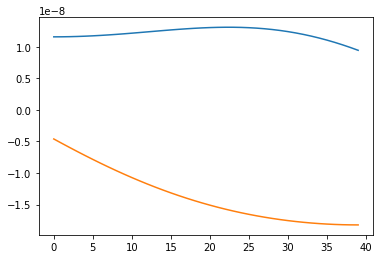

In [12]:
plt.plot(ifb2(s, xis, xjs, xj1s, xed, yds, ywd, yed)[0])
plt.plot(ifb2(s, xis, xjs, xj1s, xed, yds, ywd, yed)[-1])

In [13]:
ans, steps = ifb2(1000, xis, xjs, xj1s, xed, yds, ywd, yed, debug=True)

In [14]:
steps

0

In [15]:
well.source.integrate_source_functions_bounded(s, xis, xjs, xj1s, xed, yds, ywd, yed)

array([[ 0.02510471,  0.01692913,  0.01343551, ...,  0.00595785,
         0.00595505,  0.00595263],
       [ 0.01692913,  0.02510454,  0.01692899, ...,  0.00596109,
         0.00595785,  0.00595505],
       [ 0.0134355 ,  0.01692899,  0.02510441, ...,  0.00596485,
         0.00596109,  0.00595785],
       ..., 
       [ 0.00595783,  0.00596108,  0.00596484, ...,  0.02510439,
         0.01692896,  0.01343548],
       [ 0.00595503,  0.00595783,  0.00596107, ...,  0.01692896,
         0.02510451,  0.0169291 ],
       [ 0.00595261,  0.00595503,  0.00595783, ...,  0.01343548,
         0.0169291 ,  0.02510468]])